# Bootstrapping on the 1000-state Random Walk

State aggregation is a special case of linear function approximation, so let’s return to the 1000-state random walk to illustrate some of the observations made in this chapter.
- The left panel of Figure 9.2 shows the final VF learned by the semi-gradient TD(0) algorithm using the same state aggregation as in Example 9.1.
  - We see that the near asymptotic TD approximation is indeed farther from the true values than the MC approximation shown in Figure 9.1.
  - Nevertheless, TD methods retain large potential advantages in learning rate, and generalize MC methods.
- The right panel of Figure 9.2 shows results with an n-step semi-gradient TD method using state aggregation on the 1000-state random walk that are strikingly similar to those we obtained earlier with tabular methods and the 19-state random walk (Figure 7.2).
  - To obtain such quantitatively similar results we switched the state aggregation to 20 groups of 50 states each.
  - The 20 groups were then quantitatively close to the 19 states of the tabular problem.
  - In particular, recall that state transitions were up to 100 states to the left or right.
  - A typical transition would then be of 50 states to the right or left, which is quantitatively analogous to the single-state state transitions of the 19-state tabular system.
  - To complete the match, we use here the same performance measure — an unweighted average of the RMS error over all states and over the 1st 10 episodes — rather than a $\overline{VE}$ objective as is otherwise more appropriate when using function approximation.

In [1]:
from IPython.display import Image

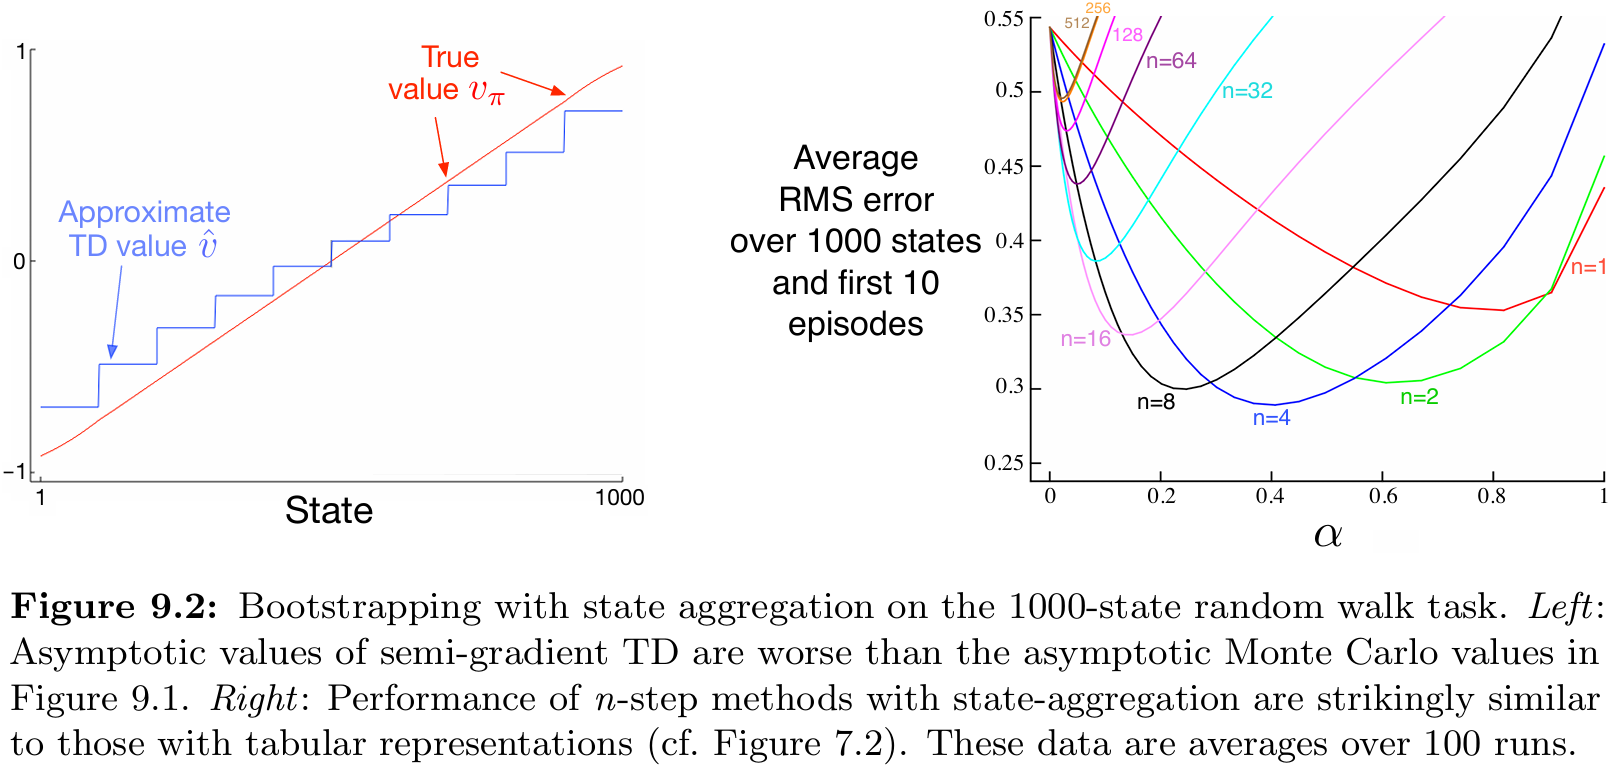

In [2]:
Image(filename="../book_images/Figure_9_2.PNG")

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm

matplotlib.use('Agg')

In [4]:
from src.random_walk import compute_true_value, ValueFunction, semi_gradient_temporal_difference, states, states_number

In [5]:
# Compute the true state values
true_values = compute_true_value()

Started computing the true values of states. Please wait.
Finished computing the true values of states. You should see the progress bar below.


## Left Plot

In [6]:
plt.figure(figsize=(10, 20))
plt.subplot(2, 1, 1)

<Axes: >

In [7]:
# Number of episodes
episodes = int(1e5)

# Step-size parameter
step_size = 2e-4

In [8]:
# VF has 10 aggregations in this example, each aggregation has 100 states
value_function = ValueFunction(num_of_groups=10)

for _ in tqdm(range(episodes)):
    # Semi-gradient TD on 1000-state random walk
    semi_gradient_temporal_difference(value_function, 1, step_size)

100%|██████████| 100000/100000 [01:00<00:00, 1647.72it/s]


In [9]:
# Get the approximate state values
approximate_values = [value_function.value(s) for s in states]

In [10]:
# Plotting
plt.plot(states, approximate_values, label=r"Approximate TD value $\^v$")
plt.plot(states, true_values[1: -1], label=r"True value $v_{\pi}$")
plt.xlabel("State")
plt.ylabel("Value")
plt.legend()

## Right Plot

In [11]:
plt.subplot(2, 1, 2)

<Axes: >

In [12]:
# All possible steps
steps = np.power(2, np.arange(0, 10))

# All possible step-size parameters
step_sizes = np.arange(0, 1.1, 0.1)

In [13]:
# Perform 100 independent runs
runs = 100

# Each run has 10 episodes
episodes = 10

In [14]:
# Track the errors for each (step, step-size parameter) combination
errors = np.zeros((len(steps), len(step_sizes)))

In [15]:
# For every run
for run in tqdm(range(runs)):
    # for every step
    for step_index, step in zip(range(len(steps)), steps):
        # for every step-size parameter
        for step_size_index, step_size in zip(range(len(step_sizes)), step_sizes):
            # we have 20 aggregations in this example
            value_function = ValueFunction(num_of_groups=20)
            
            for _ in range(episodes):
                # different step-size parameters and steps for semi-gradient TD
                semi_gradient_temporal_difference(value_function, step, step_size)
                
                # get the approximate state values
                approximate_value = np.asarray([value_function.value(s) for s in states])
                
                # calculate the RMS error
                errors[step_index, step_size_index] += np.sqrt(np.sum(np.power(approximate_value - true_values[1: -1], 2)) / states_number)

100%|██████████| 100/100 [03:20<00:00,  2.01s/it]


In [16]:
# Take average
errors /= episodes * runs

In [17]:
# Truncate the error
for i in range(len(steps)):
    plt.plot(step_sizes, errors[i, :], label='n = ' + str(steps[i]))

In [18]:
# Plotting
plt.xlabel(r"$\alpha$")
plt.ylabel("Average RMS error over 1000 states and first 10 episodes")
plt.ylim([0.25, 0.55])
plt.legend()

In [19]:
plt.savefig("../generated_images/figure_9_2.png")
plt.close()